<a href="https://colab.research.google.com/github/bacetiner/BRAILS/blob/master/notebooks/BRAILS_InventoryGenerator_SampleColabCall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install the latest version of BRAILS:

In [1]:
pip install git+https://github.com/NHERI-SimCenter/BRAILS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/NHERI-SimCenter/BRAILS to /tmp/pip-req-build-oub2q6nk
  Running command git clone -q https://github.com/NHERI-SimCenter/BRAILS /tmp/pip-req-build-oub2q6nk


## Initialize the InventoryGenerator for your location of interest:
If the provided API Key is valid and has the required APIs (i.e., Street View Static API, and Maps Static API) enabled, the following code will display work as expected.

If you receive an API key error, please make sure you have a [valid API key](https://developers.google.com/maps/documentation/embed/get-api-key) and [have Street View Static API, and Maps Static API enabled](https://support.google.com/googleapi/answer/6158841?hl=en) for this key.

In [3]:

# Import InventoryGenerator:
from brails.InventoryGenerator import InventoryGenerator

# Initialize InventoryGenerator:
invGenerator = InventoryGenerator(location='Enter the Location You Want the Inventory for Here, e.g., Berkeley, CA',
                                  nbldgs=100, randomSelection=True,
                                  GoogleAPIKey="Enter Google API Key Here")


Searching for Berkeley, CA...
Found Berkeley, Alameda County, CAL Fire Northern Region, California, United States

Fetching footprint data for Berkeley...
Found a total of 35346 building footprints in Berkeley
Randomly selected 100 buildings


## Run InventoryGenerator for all enabled attributes 

In [4]:
#invGenerator.enabledAttributes
invGenerator.generate(attributes='all')


Determining the number of floors for each building...
Loading default floor detector model file to tmp/models folder...
Default floor detector model loaded
Performing floor detections...


100%|██████████| 100/100 [00:26<00:00,  3.74it/s]



Total execution time: 00:00:31.71

Determining the heights and roof pitch for each building...
Loading default facade parser model file to tmp/models folder...
Default facade parser model loaded


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]



Checking the existence of chimneys for each building...
Loading default chimney detector model file to tmp/models folder...
Default chimney detector model loaded
Performing chimney detections...


100%|██████████| 100/100 [00:15<00:00,  6.32it/s]



Total execution time: 00:00:16.72

Determining the era of construction for each building...
Loading default era of construction classifier model file to tmp/models folder...

Default era of construction classifier model loaded
Performing construction era classifications...


100%|██████████| 100/100 [00:00<00:00, 272711.57it/s]




Checking the existence of garages for each building...
Loading default garage detector model file to tmp/models folder...


Default garage detector model loaded
Performing garage detections...


100%|██████████| 100/100 [00:16<00:00,  6.09it/s]



Total execution time: 00:00:17.31

Determining the roof type for each building...
Loading default roof type classifier model file to tmp/models folder...

Model found locally: ./tmp/models/transformer_rooftype_v1.pkl 
Loading  ./tmp/models/transformer_rooftype_v1.pkl
                          image prediction  probability
0    tmp/images/satellite/0.png       flat     0.998295
1    tmp/images/satellite/1.png     gabled     0.999999
2    tmp/images/satellite/2.png       flat     0.999939
3    tmp/images/satellite/3.png       flat     0.992569
4    tmp/images/satellite/4.png     gabled     0.999990
..                          ...        ...          ...
95  tmp/images/satellite/95.png     hipped     1.000000
96  tmp/images/satellite/96.png     gabled     1.000000
97  tmp/images/satellite/97.png       flat     0.997960
98  tmp/images/satellite/98.png       flat     0.992386
99  tmp/images/satellite/99.png     hipped     0.853740

[100 rows x 3 columns]
Results written in file ./tmp/roofT

## Show a snippet of the computed attribute values:

In [5]:
invGenerator.inventory

,footprint,satellite_images,street_images,nstories,buildingheight,chimneyExists,eraBuilt,garageExists,roofeaveheight,roofpitch,roofshape
0,"[[-122.2983117, 37.8657377], [-122.2982712, 37...",tmp/images/satellite/0.png,tmp/images/street/0.png,1,16.6,False,Pre-1970,True,14.8,0.06,Flat
1,"[[-122.2793234, 37.8976833], [-122.2793214, 37...",tmp/images/satellite/1.png,tmp/images/street/1.png,1,32.1,False,Pre-1970,False,15.1,0.65,Gable
2,"[[-122.2901031, 37.8681056], [-122.2900881, 37...",tmp/images/satellite/2.png,tmp/images/street/2.png,1,20.1,False,Pre-1970,False,17.8,0.16,Flat
3,"[[-122.2877556, 37.8583993], [-122.2877415, 37...",tmp/images/satellite/3.png,tmp/images/street/3.png,2,NaN,False,Pre-1970,False,NaN,NaN,Flat
4,"[[-122.2731439, 37.8598559], [-122.2730928, 37...",tmp/images/satellite/4.png,tmp/images/street/4.png,3,62.4,False,Pre-1970,False,44.8,0.52,Gable
...,...,...,...,...,...,...,...,...,...,...,...
95,"[[-122.2912109, 37.8813178], [-122.2912095, 37...",tmp/images/satellite/95.png,tmp/images/street/95.png,2,37.9,False,Pre-1970,True,31.8,0.41,Hip
96,"[[-122.2771664, 37.8989287], [-122.2770586, 37...",tmp/images/satellite/96.png,tmp/images/street/96.png,3,51.2,True,Pre-1970,True,44.6,0.23,Gable
97,"[[-122.2738461, 37.8831535], [-122.2738486, 37...",tmp/images/satellite/97.png,tmp/images/street/97.png,1,13.4,False,Pre-1970,True,10.7,0.06,Flat
98,"[[-122.2561551, 37.8580264], [-122.2559372, 37...",tmp/images/satellite/98.png,tmp/images/street/98.png,1,19.9,False,Pre-1970,True,17.0,0.18,Flat


## Scroll through the images parsed by the InventoryGenerator

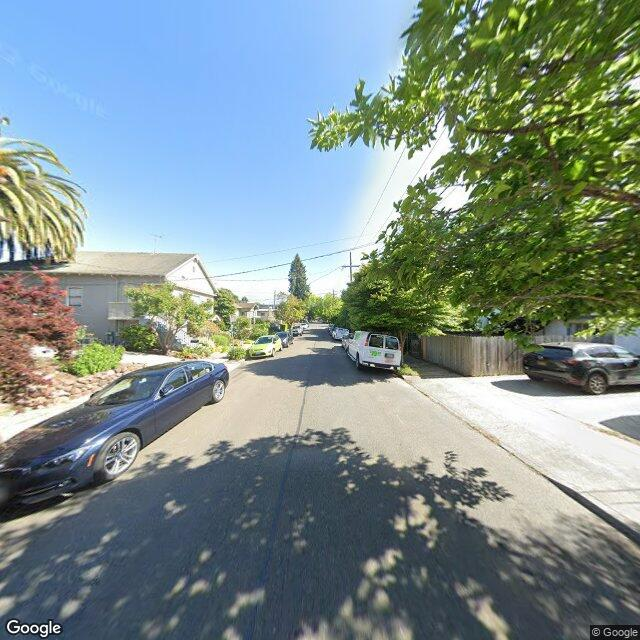

In [13]:
from IPython.display import Image
import os
images = ['tmp/images/street/' + im for im in os.listdir('tmp/images/street')]
Image(filename=images[-2]) 

## Download the created inventory table as a CSV file:

In [14]:
from google.colab import files
files.download('inventory.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>